In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv('/content/drive/MyDrive/final/Train_Data.csv')
test = pd.read_csv('/content/drive/MyDrive/final/Test_Data.csv')

##Preprocessing

In [3]:
train.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference               10
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  973
Physical activity            973
Regular sleeping hours       973
Alcohol consumption          973
Social interaction           973
Taking supplements           973
Mental health management     973
Illness count last year      973
Healthy                        0
dtype: int64

In [4]:
test.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference                3
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  262
Physical activity            262
Regular sleeping hours       262
Alcohol consumption          262
Social interaction           262
Taking supplements           262
Mental health management     262
Illness count last year      262
dtype: int64

In [5]:
train = train.fillna(method = 'pad')
test = test.fillna(method = 'pad')

<Axes: >

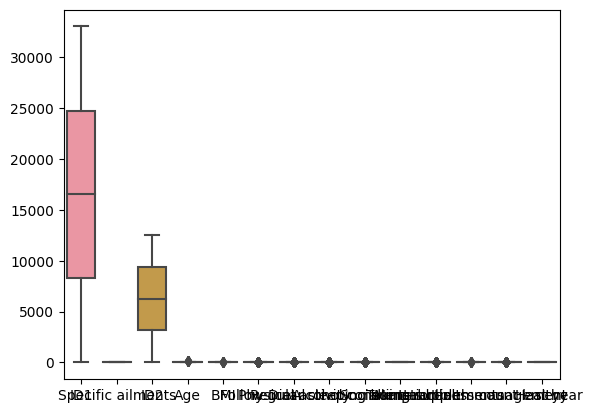

In [6]:
sns.boxplot(train)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID1                        25920 non-null  int64  
 1   Specific ailments          25920 non-null  int64  
 2   ID2                        25920 non-null  int64  
 3   Food preference            25920 non-null  object 
 4   Age                        25920 non-null  int64  
 5   BMI                        25920 non-null  float64
 6   Smoker?                    25920 non-null  object 
 7   Living in?                 25920 non-null  object 
 8   Any heriditary condition?  25920 non-null  object 
 9   Follow Diet                25920 non-null  float64
 10  Physical activity          25920 non-null  float64
 11  Regular sleeping hours     25920 non-null  float64
 12  Alcohol consumption        25920 non-null  float64
 13  Social interaction         25920 non-null  flo

In [8]:
train_cat = train.select_dtypes(object)
train_num = train.select_dtypes(["int64", "float64"])

In [9]:
for col in train_cat:
  train_cat[col] = LabelEncoder().fit_transform(train_cat[col])

In [10]:
train = pd.concat([train_cat, train_num], axis=1, join='inner')

In [11]:
train

,Food preference,Smoker?,Living in?,Any heriditary condition?,ID1,Specific ailments,ID2,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,31,1,0,0,2408,44,2668,49,20.500470,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25,1,1,0,25063,39,10363,20,26.076580,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,31,1,1,0,26798,29,132,1,21.420866,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0,1,0,0,31907,27,10499,30,25.203247,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,31,2,0,0,26412,9,7963,40,19.355846,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,31,2,0,0,69,12,818,58,25.515286,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
25916,31,1,0,0,21001,39,11500,16,27.094959,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
25917,0,1,0,0,4263,44,2796,8,28.602921,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
25918,0,1,0,0,11208,52,12190,52,21.909832,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1


In [12]:
test_cat = test.select_dtypes(object)
test_num = test.select_dtypes(["int64", "float64"])

In [13]:
for col in test_cat:
  test_cat[col] = LabelEncoder().fit_transform(test_cat[col])

In [14]:
test = pd.concat([test_cat, test_num], axis=1, join='inner')

In [15]:
test

,Food preference,Smoker?,Living in?,Any heriditary condition?,ID1,Specific ailments,ID2,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,31,2,1,0,28534,2,3306,38,18.879331,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0,1,1,0,7970,5,5573,46,21.231991,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28,1,0,0,22039,37,9305,11,17.867876,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,30,1,0,0,12332,44,8274,10,26.886096,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,25,1,0,0,4116,37,4558,3,23.362746,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,24,1,1,0,23747,21,3612,27,28.880884,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
6476,24,1,0,0,26138,27,4169,8,20.358229,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
6477,31,1,0,0,7536,39,8525,29,27.365294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6478,30,2,1,0,29410,29,1866,65,22.546412,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Food preference
-1.2448178186517134


<Figure size 640x480 with 0 Axes>

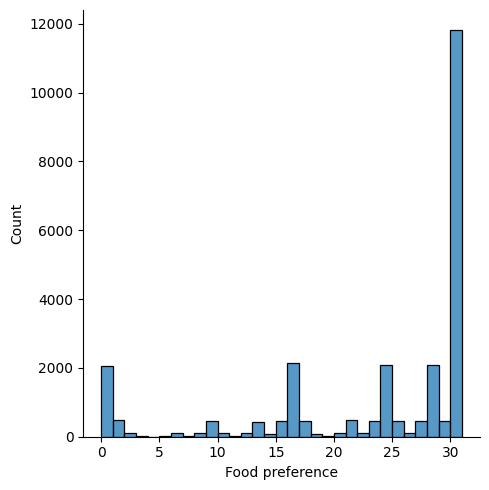

Smoker?
0.30250883749274227


<Figure size 640x480 with 0 Axes>

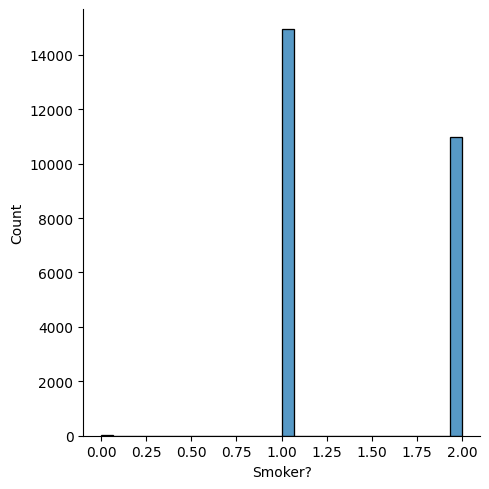

Living in?
0.8600876510935749


<Figure size 640x480 with 0 Axes>

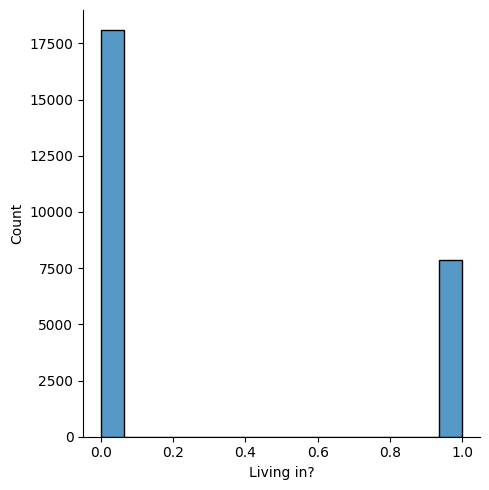

Any heriditary condition?
nan


<Figure size 640x480 with 0 Axes>

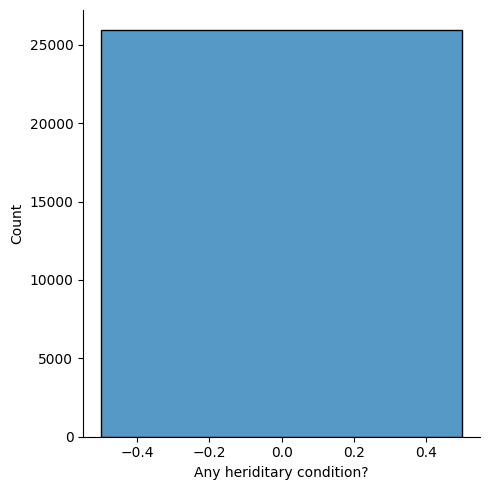

ID1
0.0003522672714830371


<Figure size 640x480 with 0 Axes>

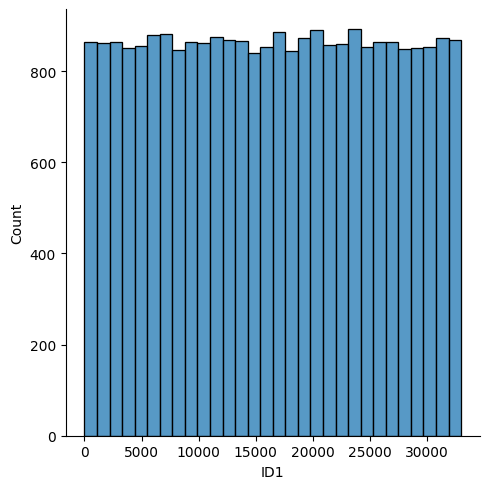

Specific ailments
0.0010354711299728082


<Figure size 640x480 with 0 Axes>

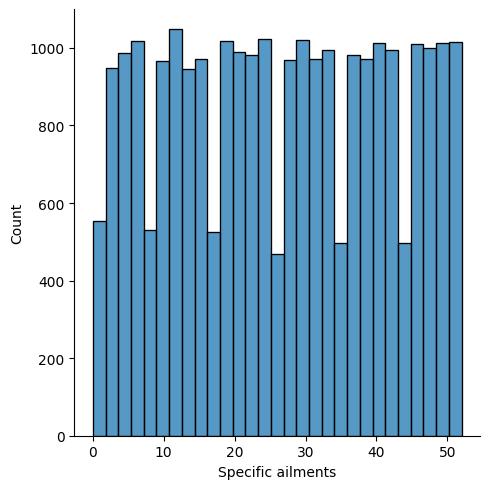

ID2
-0.0033584151080225297


<Figure size 640x480 with 0 Axes>

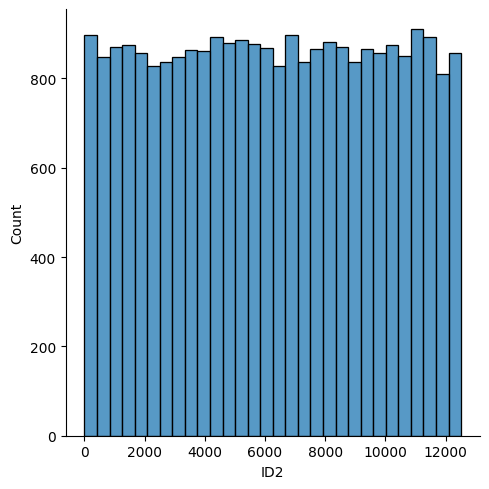

Age
0.02608918902180937


<Figure size 640x480 with 0 Axes>

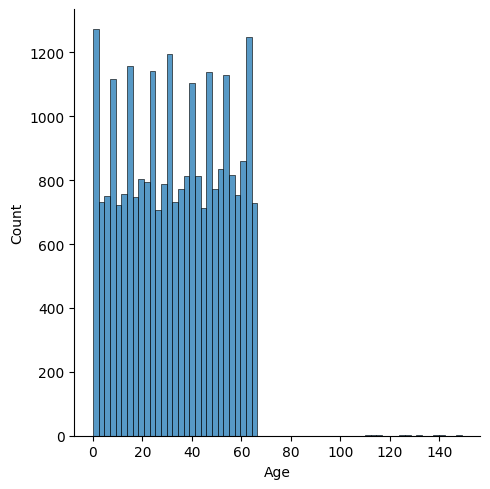

BMI
-0.049314944375078155


<Figure size 640x480 with 0 Axes>

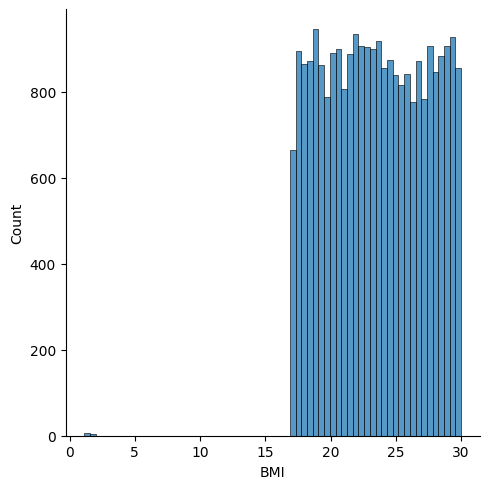

Follow Diet
-2.5875242138928938


<Figure size 640x480 with 0 Axes>

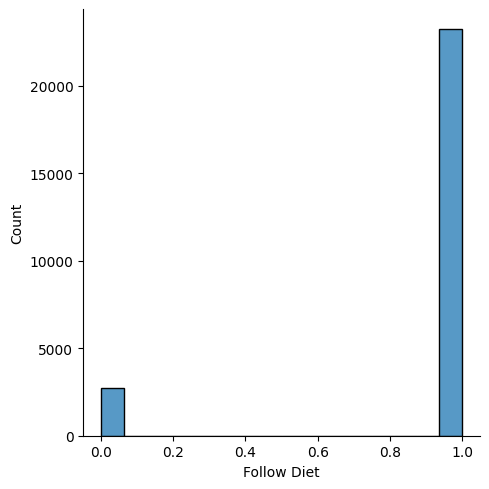

Physical activity
2.088370255146497


<Figure size 640x480 with 0 Axes>

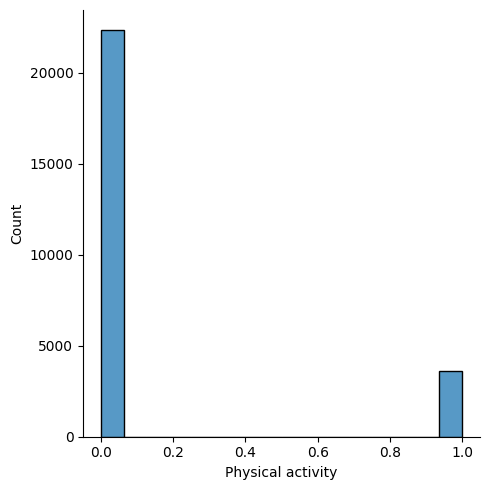

Regular sleeping hours
1.629470171006452


<Figure size 640x480 with 0 Axes>

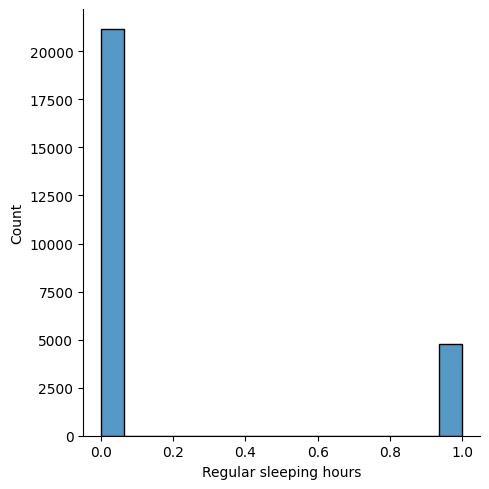

Alcohol consumption
3.0087318448493514


<Figure size 640x480 with 0 Axes>

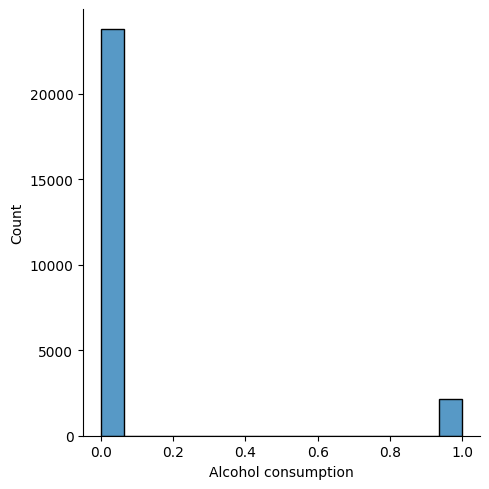

Social interaction
0.423211506892573


<Figure size 640x480 with 0 Axes>

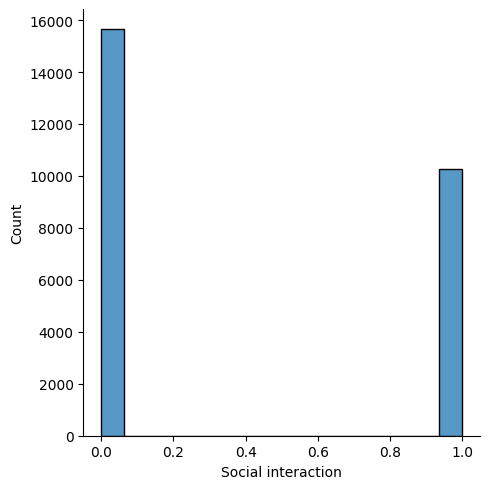

Taking supplements
3.990063327168568


<Figure size 640x480 with 0 Axes>

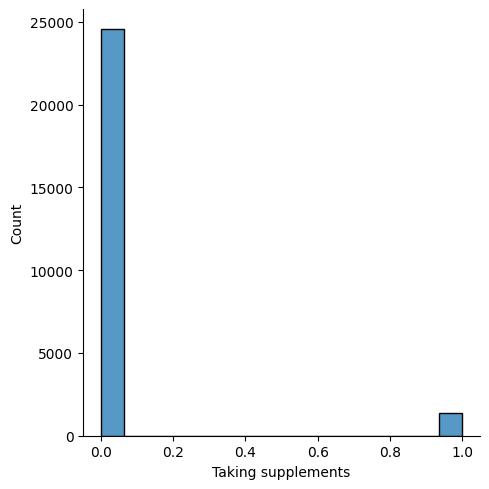

Mental health management
50.88222072542995


<Figure size 640x480 with 0 Axes>

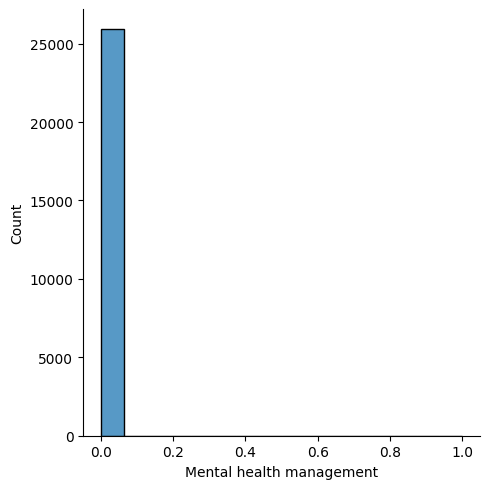

Illness count last year
0.768640058384749


<Figure size 640x480 with 0 Axes>

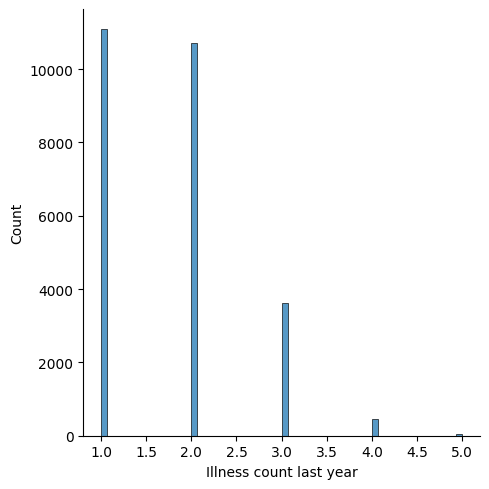

Healthy
-0.5334517255257958


<Figure size 640x480 with 0 Axes>

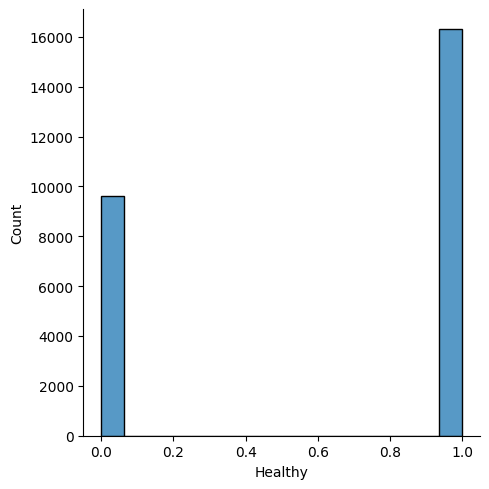

In [16]:
for col in train:
  print(col)
  print(skew(train[col]))

  plt.figure()
  sns.displot(train[col])
  plt.show()

##Split

In [17]:
x_train = train.drop('Healthy', axis=1).values
y_train = train['Healthy'].values

In [21]:
x_test = test.values

##Testing and Training


In [20]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(x_test)

In [23]:
for i in range(y_pred.shape[0]):
  if(y_pred[i]>0.5):
    y_pred[i] = 1
  else:
    y_pred[i] = 0

In [24]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [31]:
df = pd.DataFrame(y_pred)
df.to_csv("Prateek_psogra20.csv")

In [30]:
df.rename(columns = {'0':'predictions'},
            inplace = True)
print(df)

      0
0     1
1     1
2     1
3     1
4     1
...  ..
6475  1
6476  1
6477  1
6478  1
6479  1

[6480 rows x 1 columns]
